In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/Ice_cream selling data.csv')

In [ ]:
df.head()

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


In [ ]:
df.tail()

,Temperature (°C),Ice Cream Sales (units)
44,3.610778,28.912188
45,3.704057,17.843957
46,4.130868,34.530743
47,4.133534,27.698383
48,4.899032,41.514822


In [ ]:
df.isna().sum()

Temperature (°C)           0
Ice Cream Sales (units)    0
dtype: int64

In [ ]:
df.dtypes

Temperature (°C)           float64
Ice Cream Sales (units)    float64
dtype: object

In [ ]:
x=df.iloc[:,:-1]
x

,Temperature (°C)
0,-4.662263
1,-4.316559
2,-4.213985
3,-3.949661
4,-3.578554
5,-3.455712
6,-3.108440
7,-3.081303
8,-2.672461
9,-2.652287


In [ ]:
y=df.iloc[:,-1]
y

0     41.842986
1     34.661120
2     39.383001
3     37.539845
4     32.284531
5     30.001138
6     22.635401
7     25.365022
8     19.226970
9     20.279679
10    13.275828
11    18.123991
12    11.218294
13    10.012868
14    12.615181
15    10.957731
16     6.689123
17     9.392969
18     5.210163
19     4.673643
20     0.328626
21     0.897603
22     3.165600
23     1.931416
24     2.576782
25     4.625689
26     0.789974
27     2.313806
28     1.292361
29     0.953115
30     3.782570
31     4.857988
32     8.943823
33     8.170735
34     7.412094
35    10.336631
36    15.996620
37    12.568237
38    21.342916
39    20.114413
40    22.839406
41    16.983279
42    25.142082
43    26.104740
44    28.912188
45    17.843957
46    34.530743
47    27.698383
48    41.514822
Name: Ice Cream Sales (units), dtype: float64

Text(0, 0.5, 'Ice Cream Sales (units)')

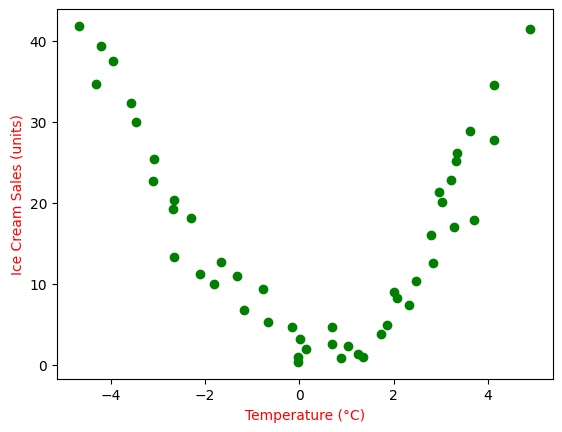

In [ ]:
plt.scatter(x,y,color='g')
plt.xlabel('Temperature (°C)',color='r')
plt.ylabel('Ice Cream Sales (units)',color='r')

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
y_test

13    10.012868
45    17.843957
47    27.698383
44    28.912188
17     9.392969
27     2.313806
26     0.789974
25     4.625689
31     4.857988
19     4.673643
12    11.218294
4     32.284531
34     7.412094
8     19.226970
3     37.539845
Name: Ice Cream Sales (units), dtype: float64

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=3)
x_poly=poly.fit_transform(x_train)
x_test_poly=poly.fit_transform(x_test)


In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_poly,y_train)
y_pred=model.predict(x_test_poly)
y_pred

array([11.20021744, 26.23272591, 32.95789778, 24.89284992,  5.15515431,
        3.70314431,  3.35626787,  3.05375082,  7.27346025,  3.30232711,
       13.51095953, 28.73827667, 10.58439543, 18.63543853, 33.47652789])

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error,r2_score
print("MAPE is : ",mean_absolute_percentage_error(y_test,y_pred))

MAPE is :  0.4819652221528753


In [ ]:
print("r2_score : ",r2_score(y_test,y_pred))

r2_score :  0.9011541169923964


In [ ]:
df1=pd.DataFrame({'actual':y_test,'predicted':y_pred,'difference':y_test-y_pred})
df1

,actual,predicted,difference
13,10.012868,11.200217,-1.187350
45,17.843957,26.232726,-8.388769
47,27.698383,32.957898,-5.259514
44,28.912188,24.892850,4.019338
17,9.392969,5.155154,4.237814
27,2.313806,3.703144,-1.389338
26,0.789974,3.356268,-2.566294
25,4.625689,3.053751,1.571939
31,4.857988,7.273460,-2.415472
19,4.673643,3.302327,1.371315


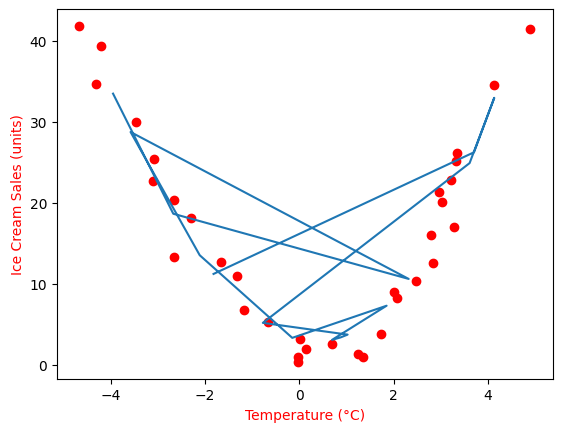

In [ ]:
plt.scatter(x_train,y_train,color='r')
plt.xlabel('Temperature (°C)',color='r')
plt.ylabel('Ice Cream Sales (units)',color='r')
plt.plot(x_test,y_pred)
